In [ ]:
#conda install -c conda-forge imbalanced-learn


In [ ]:
#pip install xgboost

In [80]:
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sn


#split donnée
from sklearn import model_selection

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, GridSearchCV

#algorithme
from sklearn import dummy #afin de créer baseline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier



# Scoring
from sklearn import metrics
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve, confusion_matrix, \
    ConfusionMatrixDisplay, recall_score, precision_score, f1_score, fbeta_score, make_scorer



from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


import pickle
import math
import time
from collections import Counter
import shap

In [2]:
#def score_MF (modele,RMSE,MSE,ROC_AUC,Recall,Precision,Score_F1,time):
    #df_scores.loc[df_scores.shape[0]] = [modele,RMSE,MSE,ROC_AUC,Recall,Precision,Score_F1,time]
    #df_scores.sort_values(by='R2', ascending=False, inplace=True)
    #df_scores.drop_duplicates(subset=['modele'], keep='last', inplace=True)
    #df_scores.reset_index(drop=True, inplace=True)
    #return df_scores

In [3]:
#scores_MF = []

#df_scores = pd.DataFrame(
    #scores_MF, columns=['modele','RMSE','MSE','ROC_AUC','Recall','Precision','Score F1','time'])

In [4]:
#def score_modele (modele,RMSE,MSE,ROC_AUC,Recall,Precision,Score_F1,time):
    #df_scores_modele.loc[df_scores_modele.shape[0]] = [modele,RMSE,MSE,ROC_AUC,Recall,Precision,Score_F1,time]
    #df_scores_modele.sort_values(by='R2', ascending=False, inplace=True)
    #df_scores_modele.drop_duplicates(subset=['modele'], keep='last', inplace=True)
    #df_scores_modele.reset_index(drop=True, inplace=True)
    #return df_scores_modele

In [5]:
#scores_modele = []

#df_scores_modele = pd.DataFrame(
    #scores_modele, columns=['modele','RMSE','MSE','ROC_AUC','Recall','Precision','Score F1','time'])

In [6]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.reshape(-1,)
y_test = pd.read_csv('y_test.csv').values.reshape(-1,)

In [7]:
X_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_COUNT
0,0,0,0,0,0.330208,0.209927,1.149201,0.121254,-1.028494,-17929,...,0.113811,1.094584,-0.357175,1.109920,0.076327,1.010774,0.586329,0.355137,-0.231067,0.919261
1,1,1,0,0,0.172157,-0.506365,-0.121313,-0.385513,3.729748,-21409,...,0.038509,-0.277244,0.290839,-0.460954,0.022905,-0.272805,-0.108785,0.146414,0.417143,-0.437245
2,1,0,0,0,-0.175556,-0.194403,0.045957,-0.240722,-0.979669,-19843,...,-0.348772,-0.094331,-0.350782,-0.508440,-0.476940,-0.315789,0.264912,0.003937,-0.191701,0.432966
3,1,0,1,0,-0.428438,-1.026919,-0.844818,-1.012939,1.831045,-16129,...,0.195283,0.308550,-0.357259,-0.450247,0.139968,0.257300,0.489517,0.083303,0.113017,0.023455
4,1,0,0,4,-0.428438,-0.838747,-0.992409,-0.747490,-0.993031,-14691,...,-0.521778,-0.684395,0.077966,-0.544201,-0.500720,-0.664462,0.597947,1.224706,0.705822,-0.667595


In [8]:
y_train

array([1, 1, 1, ..., 1, 0, 1])

In [9]:
y_test

array([1, 0, 1, ..., 0, 1, 1])

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(201706, 519)
(50427, 519)
(201706,)
(50427,)


In [11]:
def RSE(y_test, predictions):
    y_barre = np.mean(y_test)
    RSE = sum((y_test - predictions)**2)/sum((y_test - y_barre)**2)
    return RSE



def result(model, X_test, y_test, predictions, seuil=0.5, cv=True):
    scores = []

    if cv:
        # Cross-validation score
        cv_score = model.best_score_
        print('Cross Validation score = {:.2f}'.format(cv_score))
        scores.append(cv_score)
    else:
        scores.append('')
    
    # Test score
    test_score = model.score(X_test, y_test)
    print('Test score = {:.2f}'.format(test_score))
    scores.append(test_score)

    # RMSE et MSE
    MSE = mean_squared_error(y_test, predictions, squared=True)
    print('RMSE = {:.2f}'.format(MSE**(1/2)))
    print('MSE = {:.2f}'.format(MSE))
    scores.append(MSE**(1/2))
    scores.append(MSE)

    # RSE
    RSE_ = RSE(y_test, predictions)
    print('RSE = {:.2f}'.format(RSE_))
    scores.append(RSE_)

    # ROC AUC score
    ROC_AUC = roc_auc_score(y_test, predictions)
    print('ROC_AUC = {:.2f}'.format(ROC_AUC))
    scores.append(ROC_AUC)

    y_pred = pd.Series(predictions).apply(lambda x: 1 if x >= seuil else 0)    

    # Rappel et précision
    Recall = recall_score(y_test, y_pred)
    Precision = precision_score(y_test, y_pred)
    print('Recall = {:.2f}'.format(Recall))
    print('Precision = {:.2f}'.format(Precision))
    scores.append(Recall)
    scores.append(Precision)

    # F1-score
    F1 = f1_score(y_test, y_pred)
    print('Score F1 = {:.2f}'.format(F1))
    scores.append(F1)
    
    # Courbe ROC
    [fpr, tpr, thr] = roc_curve(y_test, predictions)
    scores.append([fpr, tpr, thr])
    fig = plt.figure(figsize =(4, 4))
    plt.plot(fpr, tpr, color='coral', lw=2, label='Classifier')
    plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False positive rate', fontsize=10)
    plt.ylabel('True positive rate', fontsize=10)
    plt.show()
    
    #Matrice de confusion 
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='', cmap='Greens')
    
    
    return scores

In [12]:
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 184224, 0: 17482})
Counter({1: 46074, 0: 4353})


#### DummyClassifier baseline

In [13]:
np.random.seed(5)
cv_strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=45)

In [14]:
dummy = DummyClassifier(strategy='most_frequent', random_state=0)

dummy.fit(X_train, y_train)
prediction_dummy = dummy.predict_proba(X_test)

Test score = 0.91
RMSE = 0.29
MSE = 0.09
RSE = 1.09
ROC_AUC = 0.50
Recall = 1.00
Precision = 0.91
Score F1 = 0.95


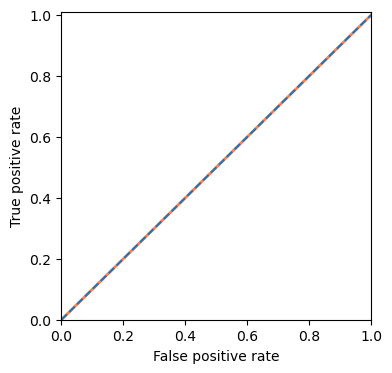

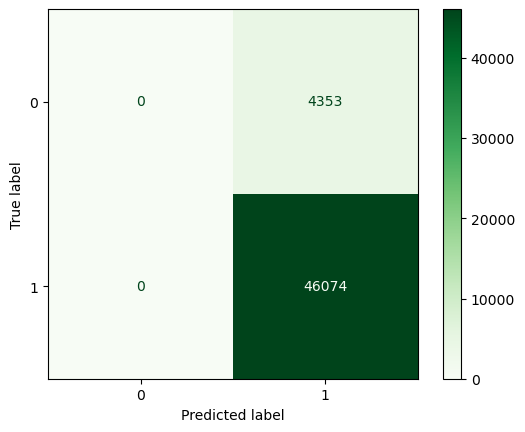

In [15]:
result_dummy = result(dummy, X_test, y_test, prediction_dummy[:, 1], cv=False)

In [16]:
#with open('dummy.pickle', 'wb') as file:
    #pickle.dump(dummy, file)

#### GridSearch - Random Forest Classifier

In [17]:
param_RF = {'n_estimators': [100, 150, 200],
            'max_depth': [3, 5, None],
            'bootstrap': [True, False],
            'min_samples_leaf': [2, 4]}

RF = GridSearchCV(RandomForestClassifier(random_state=0),
                  param_grid=param_RF,
                  cv=cv_strat,
                  scoring='roc_auc',
                  verbose=3)

#RF.fit(X_train, y_train)
RF = pickle.load(open('RF.pickle', 'rb'))


prediction_RF = RF.predict_proba(X_test)

Meilleurs hyperparamètres : {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 200}
Cross Validation score = 0.74
Test score = 0.75
RMSE = 0.27
MSE = 0.07
RSE = 0.92
ROC_AUC = 0.75
Recall = 1.00
Precision = 0.91
Score F1 = 0.95


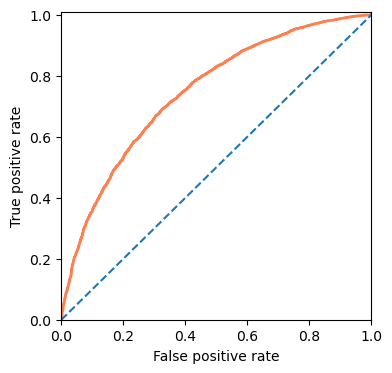

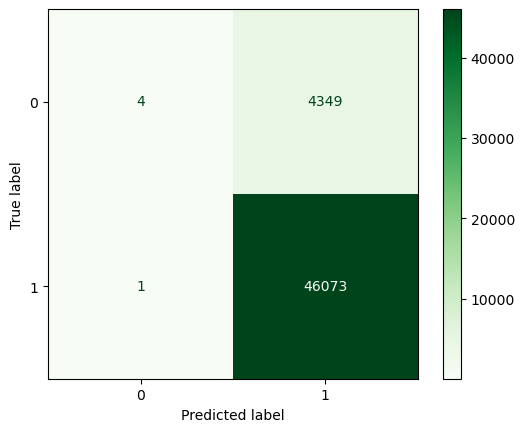

In [18]:
print('Meilleurs hyperparamètres : ' + str(RF.best_params_))

result_RF = result(RF, X_test, y_test, prediction_RF[:, 1])

In [19]:
#with open('RF.pickle', 'wb') as file:
    #pickle.dump(RF, file)

#### GridSearch - LightGBM classifier

In [20]:
param_LGBM = {'max_depth': [5, 10, 15],
              'num_leaves': [20, 30],
              'n_estimators': [100, 300, 500]}

LGBM = GridSearchCV(LGBMClassifier(random_state=0),
                    param_grid=param_LGBM,
                    cv=cv_strat,
                    scoring='roc_auc',
                    verbose=3)

# LGBM.fit(X_train, y_train)
LGBM = pickle.load(open('LGBM.pickle', 'rb'))

prediction_LGBM = LGBM.predict_proba(X_test)

Meilleurs hyperparamètres : {'max_depth': 5, 'n_estimators': 300, 'num_leaves': 20}
Cross Validation score = 0.78
Test score = 0.78
RMSE = 0.27
MSE = 0.07
RSE = 0.89
ROC_AUC = 0.78
Recall = 1.00
Precision = 0.92
Score F1 = 0.96


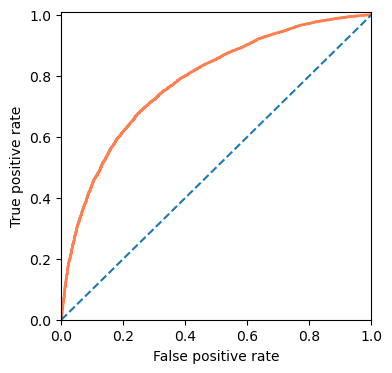

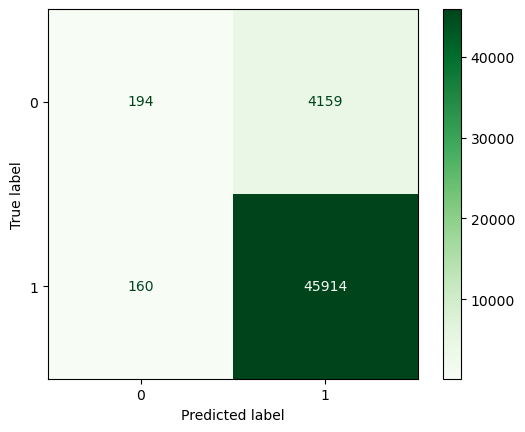

In [21]:
print('Meilleurs hyperparamètres : ' + str(LGBM.best_params_))

result_LGBM = result(LGBM, X_test, y_test, prediction_LGBM[:, 1])

In [22]:
#with open('LGBM.pickle', 'wb') as file:
    #pickle.dump(LGBM, file)

#### GridSearch EXtreme Gradient Boosting

In [23]:
param_XGB = {'max_depth': [5, 10, 15],
             'learning_rate': [0.1, 0.15, 0.3],
             'n_estimators': [100, 300, 500]}

XGB = GridSearchCV(XGBClassifier(random_state=0),
                   param_grid=param_XGB,
                   cv=cv_strat,
                   scoring='roc_auc',
                   verbose=3)

# XGB.fit(X_train, y_train)
XGB = pickle.load(open('XGB.pickle', 'rb'))

prediction_XGB = XGB.predict_proba(X_test)

Meilleurs hyperparamètres : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Cross Validation score = 0.78
Test score = 0.78
RMSE = 0.27
MSE = 0.07
RSE = 0.89
ROC_AUC = 0.78
Recall = 1.00
Precision = 0.92
Score F1 = 0.96


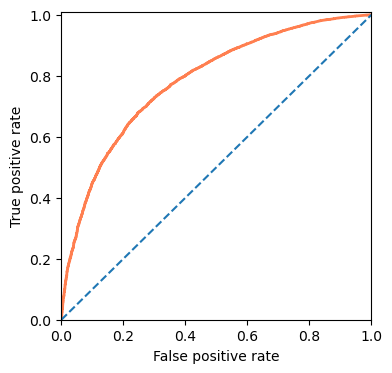

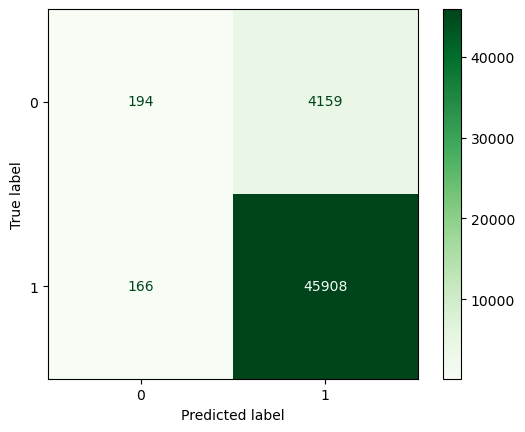

In [24]:
print('Meilleurs hyperparamètres : ' + str(XGB.best_params_))

result_XGB = result(XGB, X_test, y_test, prediction_XGB[:, 1])

In [25]:
#with open('XGB.pickle', 'wb') as file:
    #pickle.dump(XGB, file)

#### GridSearch Logistic Regression

In [26]:
param_LR = {'C': np.logspace(-4, 4, 20),
                  'penalty': ['none', 'l2']}

LR = GridSearchCV(LogisticRegression(random_state=0),
                        param_grid=param_LR,
                        cv=cv_strat,
                        scoring='roc_auc',
                        verbose=3)

# LR.fit(X_train, y_train)
LR = pickle.load(open('LR.pickle', 'rb'))

prediction_LR = LR.predict_proba(X_test)

Meilleurs hyperparamètres : {'C': 29.763514416313132, 'penalty': 'l2'}
Cross Validation score = 0.73
Test score = 0.73
RMSE = 0.27
MSE = 0.07
RSE = 0.94
ROC_AUC = 0.73
Recall = 1.00
Precision = 0.92
Score F1 = 0.95


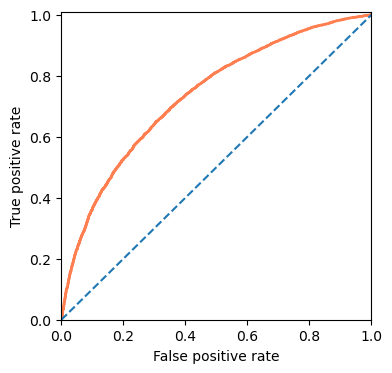

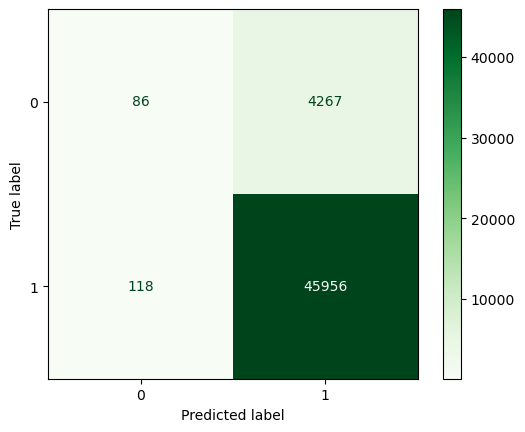

In [27]:
print('Meilleurs hyperparamètres : ' + str(LR.best_params_))

result_LR = result(LR, X_test, y_test, prediction_LR[:, 1])

In [28]:
#with open('LR.pickle', 'wb') as file:
    #pickle.dump(LR, file)

In [29]:
def displayResult(listeResult):
    listeCV = [result[0] for result in listeResult]
    listeTest = [result[1] for result in listeResult]
    listeRMSE = [result[2] for result in listeResult]
    listeMSE = [result[3] for result in listeResult]
    listeRSE = [result[4] for result in listeResult]
    listeAUC = [result[5] for result in listeResult]
    listeRecall = [result[7] for result in listeResult]
    listePrecision = [result[8] for result in listeResult]
    listeF1 = [result[9] for result in listeResult]
    listeModeles = ['Dummy Classifier', 'Random Forest', 'LGBM',
                    'XGBoost', 'Logistic Regression']
    score = pd.DataFrame()
    score['Modele'] = listeModeles
    score['Score de Cross-Validation'] = listeCV
    score['Score de test'] = listeTest
    score['RMSE'] = listeRMSE
    score['MSE'] = listeMSE
    score['RSE'] = listeRSE
    score['AUC'] = listeAUC
    score['Rappel'] = listeRecall
    score['Precision'] = listePrecision
    score['F1'] = listeF1

    fig = plt.figure(figsize=(8, 4))
    ax = sn.barplot(x='Modele', y='AUC', data=score)
    for i in ax.containers:
        ax.bar_label(i,)
    plt.title('Score AUC des differents modeles testes',
            fontsize=12)
    plt.xlabel('Les differents modeles testes', fontsize=8)
    plt.ylabel('Score AUC', fontsize=8)
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.show()

    fig = plt.figure(figsize=(8, 4))
    for result in listeResult:
        [fpr, tpr, thr] = result[9]
        plt.plot(fpr, tpr, lw=2)
    plt.legend(listeModeles)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=8)
    plt.ylabel('True Positive Rate', fontsize=8)
    plt.show()

    new_score = score.T
    new_score.columns = new_score.iloc[0, :]
    new_score.drop(new_score.loc[new_score['Dummy Classifier'] == 'Dummy Classifier'].index, inplace=True)
    return new_score

#### Result comparison GridSearch 

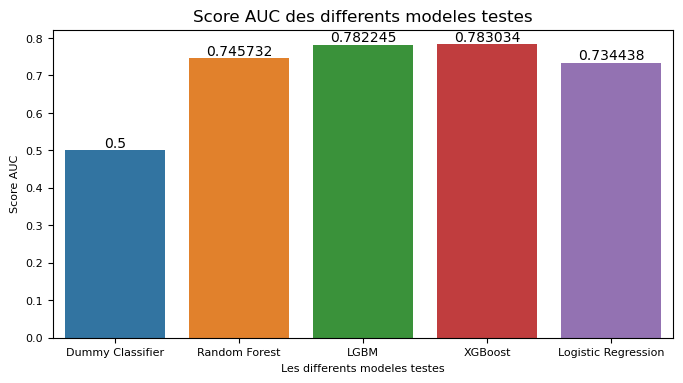

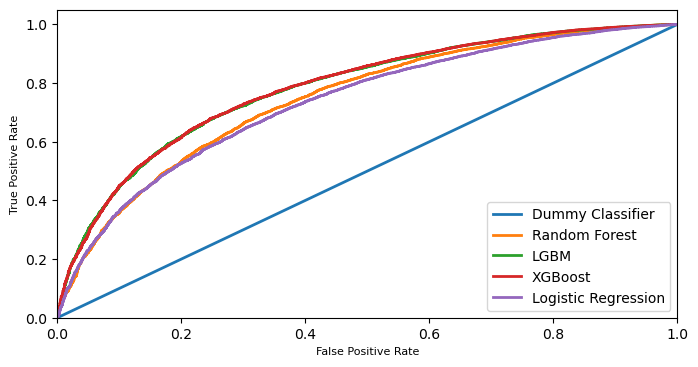

Modele,Dummy Classifier,Random Forest,LGBM,XGBoost,Logistic Regression
Score de Cross-Validation,,0.744457,0.777414,0.778557,0.732256
Score de test,0.913677,0.745732,0.782245,0.783034,0.734438
RMSE,0.293807,0.269664,0.265215,0.265058,0.271892
MSE,0.086323,0.072719,0.070339,0.070256,0.073925
RSE,1.094478,0.921996,0.891818,0.890763,0.937288
AUC,0.5,0.745732,0.782245,0.783034,0.734438
Rappel,0.913677,0.913748,0.916941,0.916931,0.915039
Precision,0.954892,0.95492,0.955079,0.955014,0.954464
F1,"[[0.0, 1.0], [0.0, 1.0], [2.0, 1.0]]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.00022972662531587412, 0.000...","[[0.0, 0.00022972662531587412, 0.0002297266253...","[[0.0, 0.0, 0.0, 0.00022972662531587412, 0.000..."


In [30]:
listeResult = [result_dummy,result_RF,result_LGBM, result_XGB, result_LR]
df_score = displayResult(listeResult)
df_score.head(df_score.shape[0])

#### GridSearch SMOTE Random Forest Classifier

In [39]:
Smote = SMOTE(sampling_strategy=0.5)
X_SMOTE, y_SMOTE = Smote.fit_resample(X_train, y_train)

In [40]:
Counter(y_SMOTE)

Counter({1: 184224, 0: 92112})

In [41]:
RF_SMOTE = GridSearchCV(RandomForestClassifier(random_state=0),
                        param_grid=param_RF,
                        cv=cv_strat,
                        scoring='roc_auc',
                        verbose=3)

# RF_SMOTE.fit(X_SMOTE, y_SMOTE)
RF_SMOTE = pickle.load(open('RF_SMOTE.pickle', 'rb'))

prediction_RF_SMOTE = RF_SMOTE.predict_proba(X_test)

Meilleurs hyperparamètres : {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 200}
Cross Validation score = 0.96
Test score = 0.73
RMSE = 0.27
MSE = 0.07
RSE = 0.95
ROC_AUC = 0.73
Recall = 1.00
Precision = 0.91
Score F1 = 0.96


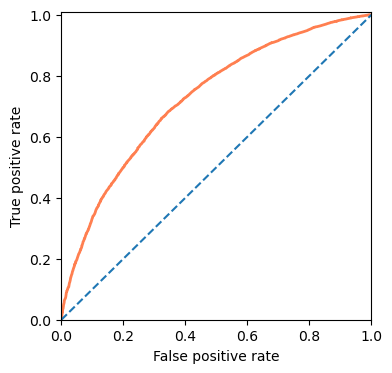

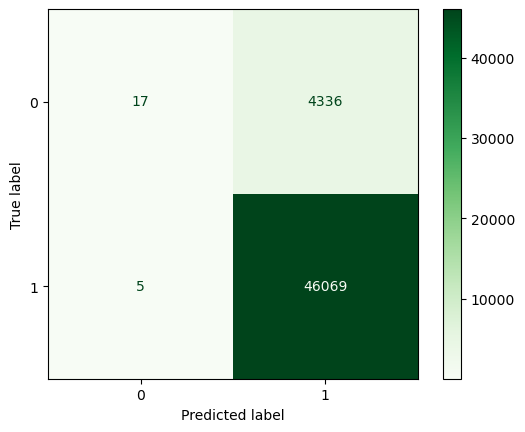

In [42]:
print('Meilleurs hyperparamètres : ' + str(RF_SMOTE.best_params_))

result_RF_SMOTE = result(RF_SMOTE, X_test, y_test, prediction_RF_SMOTE[:, 1])

In [ ]:
#with open('RF_SMOTE.pickle', 'wb') as file:
    #pickle.dump(RF_SMOTE, file)

#### GridSearch SMOTE - LightGBM classifier

In [43]:
LGBM_SMOTE = GridSearchCV(LGBMClassifier(random_state=0),
                          param_grid=param_LGBM,
                          cv=cv_strat,
                          scoring='roc_auc',
                          verbose=3)


# LGBM.fit(X_train, y_train)
LGBM_SMOTE = pickle.load(open('LGBM_SMOTE.pickle', 'rb'))

prediction_LGBM_SMOTE = LGBM_SMOTE.predict_proba(X_test)

Meilleurs hyperparamètres : {'max_depth': 5, 'n_estimators': 500, 'num_leaves': 30}
Cross Validation score = 0.96
Test score = 0.77
RMSE = 0.27
MSE = 0.07
RSE = 0.90
ROC_AUC = 0.77
Recall = 0.99
Precision = 0.92
Score F1 = 0.95


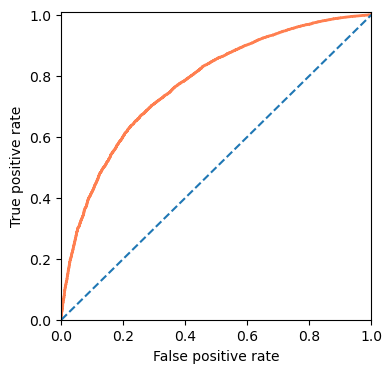

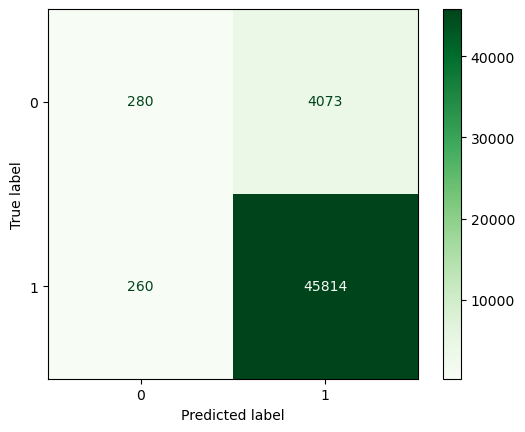

In [44]:
print('Meilleurs hyperparamètres : ' + str(LGBM_SMOTE.best_params_))

result_LGBM_SMOTE = result(LGBM_SMOTE, X_test, y_test, prediction_LGBM_SMOTE[:, 1])

In [ ]:
#with open('LGBM_SMOTE.pickle', 'wb') as file:
    #pickle.dump(LGBM_SMOTE, file)

#### GridSearch SMOTE EXtreme Gradient Boosting

In [45]:
XGB_SMOTE = GridSearchCV(XGBClassifier(random_state=0),
                         param_grid=param_XGB,
                         cv=cv_strat,
                         scoring='roc_auc',
                         verbose=3)

# XGB_SMOTE.fit(X_SMOTE, y_SMOTE)
XGB_SMOTE = pickle.load(open('XGB_SMOTE.pickle', 'rb'))

prediction_XGB_SMOTE = XGB_SMOTE.predict_proba(X_test)

Meilleurs hyperparamètres : {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 500}
Cross Validation score = 0.96
Test score = 0.76
RMSE = 0.28
MSE = 0.08
RSE = 0.98
ROC_AUC = 0.76
Recall = 1.00
Precision = 0.92
Score F1 = 0.95


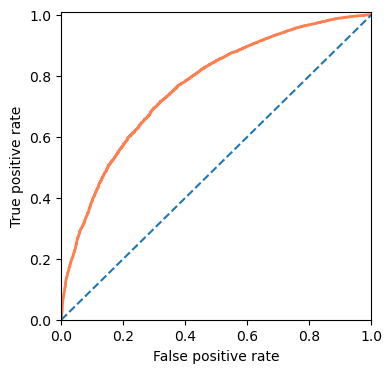

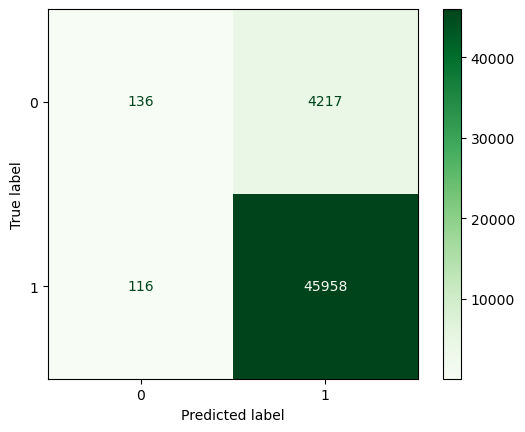

In [46]:
print('Meilleurs hyperparamètres : ' + str(XGB_SMOTE.best_params_))

result_XGB_SMOTE = result(XGB_SMOTE, X_test, y_test, prediction_XGB_SMOTE[:, 1])

In [47]:
#with open('XGB_SMOTE.pickle', 'wb') as file:
    #pickle.dump(XGB_SMOTE, file)

#### GridSearch SMOTE Logistic Regression

In [49]:
LR_SMOTE = GridSearchCV(LogisticRegression(random_state=0),
                              param_grid=param_LR,
                              cv=cv_strat,
                              scoring='roc_auc',
                              verbose=3)

# Logistic_SMOTE.fit(X_SMOTE, y_SMOTE)
LR_SMOTE = pickle.load(open('LR_SMOTE.pickle', 'rb'))

prediction_LR_SMOTE = LR_SMOTE.predict_proba(X_test)

Meilleurs hyperparamètres : {'C': 0.012742749857031334, 'penalty': 'l2'}
Cross Validation score = 0.89
Test score = 0.72
RMSE = 0.32
MSE = 0.10
RSE = 1.32
ROC_AUC = 0.72
Recall = 0.92
Precision = 0.93
Score F1 = 0.92


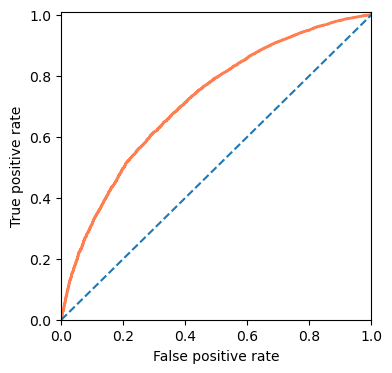

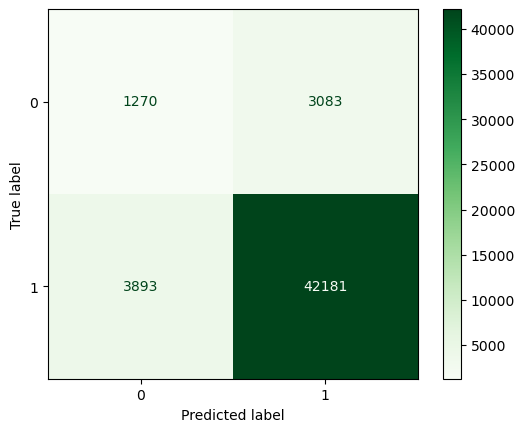

In [50]:
print('Meilleurs hyperparamètres : ' + str(LR_SMOTE.best_params_))

result_LR_SMOTE = result(LR_SMOTE, X_test, y_test, prediction_LR_SMOTE[:, 1])

In [51]:
#with open('LR_SMOTE.pickle', 'wb') as file:
    #pickle.dump(LR_SMOTE, file)

#### Result comparison GridSearch SMOTE 

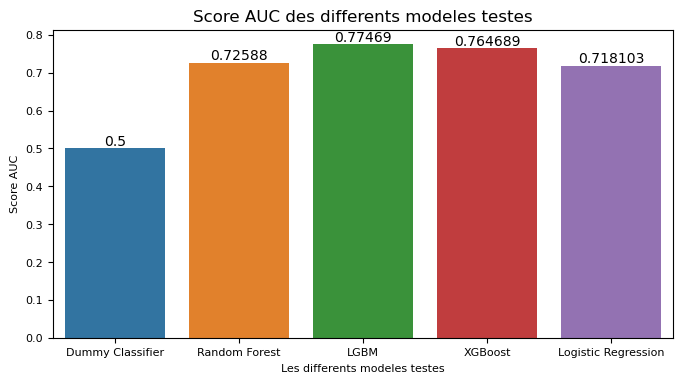

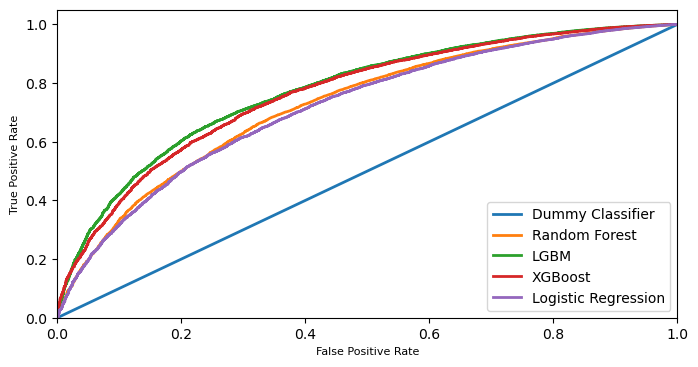

Modele,Dummy Classifier,Random Forest,LGBM,XGBoost,Logistic Regression
Score de Cross-Validation,,0.95622,0.957328,0.960281,0.890572
Score de test,0.913677,0.72588,0.77469,0.764689,0.718103
RMSE,0.293807,0.273294,0.266441,0.278393,0.32312
MSE,0.086323,0.074689,0.070991,0.077502,0.104406
RSE,1.094478,0.946979,0.900086,0.982645,1.323759
AUC,0.5,0.72588,0.77469,0.764689,0.718103
Rappel,0.913677,0.913977,0.918355,0.915954,0.931888
Precision,0.954892,0.955006,0.954846,0.954981,0.923624
F1,"[[0.0, 1.0], [0.0, 1.0], [2.0, 1.0]]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00045945325063174...","[[0.0, 0.0, 0.0, 0.00022972662531587412, 0.000...","[[0.0, 0.0, 0.0, 0.0, 0.00022972662531587412, ...","[[0.0, 0.0, 0.0, 0.00022972662531587412, 0.000..."


In [52]:
listeResult_SMOTE = [result_dummy,result_RF_SMOTE,result_LGBM_SMOTE, result_XGB_SMOTE, result_LR_SMOTE]
df_score_SMOTE = displayResult(listeResult_SMOTE)
df_score_SMOTE.head(df_score_SMOTE.shape[0])

#### GridSearch SMOTE + Random UnderSampling (RUS) - Random Forest Classifier

- L'article original sur SMOTE suggérait de combiner SMOTE avec un sous-échantillonnage aléatoire de la classe majoritaire.

- La bibliothèque d'apprentissage déséquilibré prend en charge le sous-échantillonnage aléatoire via la classe RandomUnderSampler.

- Nous nous attendrions à un suréchantillonnage SMOTE de la classe minoritaire, mais pas autant qu'auparavant où l'ensemble de données était équilibré. Nous nous attendons également à moins d'exemples dans la classe majoritaire via un sous-échantillonnage aléatoire.

In [54]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_SMOTE_RUS, y_SMOTE_RUS = pipeline.fit_resample(X_train, y_train)

In [55]:
Counter(y_SMOTE_RUS)

Counter({0: 18422, 1: 36844})

In [56]:
RF_SMOTE_RUS = GridSearchCV(RandomForestClassifier(random_state=0),
                           param_grid=param_RF,
                           cv=cv_strat,
                           scoring='roc_auc',
                           verbose=3)

# RF_SMOTE_SE.fit(X_SMOTE_RUS, y_SMOTE_RUS)
RF_SMOTE_RUS = pickle.load(open('RF_SMOTE_RUS.pickle', 'rb'))

prediction_RF_SMOTE_RUS = RF_SMOTE_RUS.predict_proba(X_test)

Meilleurs hyperparamètres : {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 200}
Cross Validation score = 0.77
Test score = 0.76
RMSE = 0.35
MSE = 0.12
RSE = 1.52
ROC_AUC = 0.76
Recall = 0.93
Precision = 0.93
Score F1 = 0.93


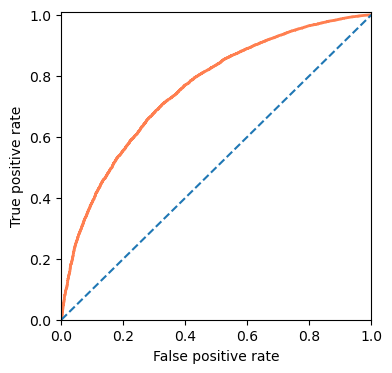

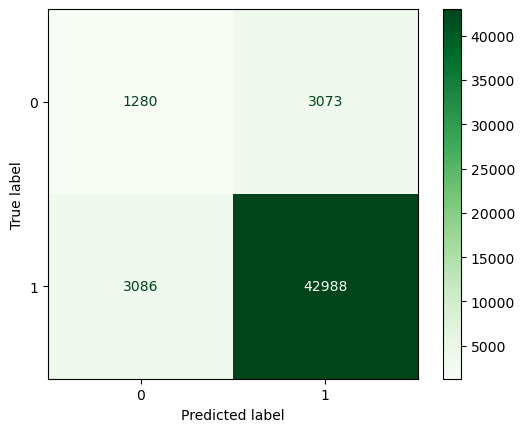

In [57]:
print('Meilleurs hyperparamètres : ' + str(RF_SMOTE_RUS.best_params_))

result_RF_SMOTE_RUS = result(RF_SMOTE_RUS, X_test, y_test, prediction_RF_SMOTE_RUS[:, 1])

In [58]:
#with open('RF_SMOTE_RUS.pickle', 'wb') as file:
    #pickle.dump(RF_SMOTE_RUS, file)

#### GridSearch SMOTE + Random UnderSampling (RUS) - LightGBM classifier

In [59]:
LGBM_SMOTE_RUS = GridSearchCV(LGBMClassifier(random_state=0),
                             param_grid=param_LGBM,
                             cv=cv_strat,
                             scoring='roc_auc',
                             verbose=3)

# LGBM_SMOTE_RUS.fit(X_SMOTE_RUS, y_SMOTE_RUS)
LGBM_SMOTE_RUS = pickle.load(open('LGBM_SMOTE_RUS.pickle', 'rb'))

prediction_LGBM_SMOTE_RUS = LGBM_SMOTE_RUS.predict_proba(X_test)

Meilleurs hyperparamètres : {'max_depth': 5, 'n_estimators': 300, 'num_leaves': 20}
Cross Validation score = 0.79
Test score = 0.78
RMSE = 0.34
MSE = 0.12
RSE = 1.49
ROC_AUC = 0.78
Recall = 0.88
Precision = 0.94
Score F1 = 0.91


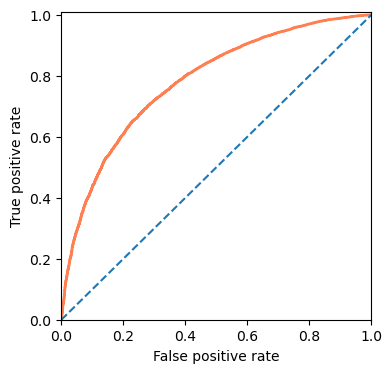

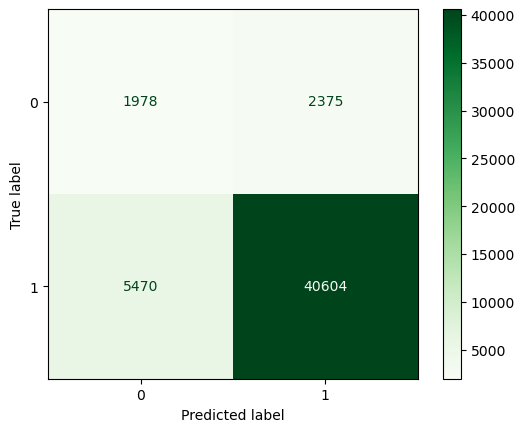

In [60]:
print('Meilleurs hyperparamètres : ' + str(LGBM_SMOTE_RUS.best_params_))

result_LGBM_SMOTE_RUS = result(LGBM_SMOTE_RUS, X_test, y_test, prediction_LGBM_SMOTE_RUS[:, 1])

In [61]:
#with open('LGBM_SMOTE_RUS.pickle', 'wb') as file:
    #pickle.dump(LGBM_SMOTE_RUS, file)

#### SMOTE + Random UnderSampling (RUS) - EXtreme Gradient Boosting

In [62]:
XGB_SMOTE_RUS = GridSearchCV(XGBClassifier(random_state=0),
                            param_grid=param_XGB,
                            cv=cv_strat,
                            scoring='roc_auc',
                            verbose=3)

# XGB_SMOTE_RUS.fit(X_SMOTE_RUS, y_SMOTE_RUS)
XGB_SMOTE_RUS = pickle.load(open('XGB_SMOTE_RUS.pickle', 'rb'))

prediction_XGB_SMOTE_RUS = XGB_SMOTE_RUS.predict_proba(X_test)

Meilleurs hyperparamètres : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Cross Validation score = 0.79
Test score = 0.78
RMSE = 0.34
MSE = 0.12
RSE = 1.49
ROC_AUC = 0.78
Recall = 0.88
Precision = 0.94
Score F1 = 0.91


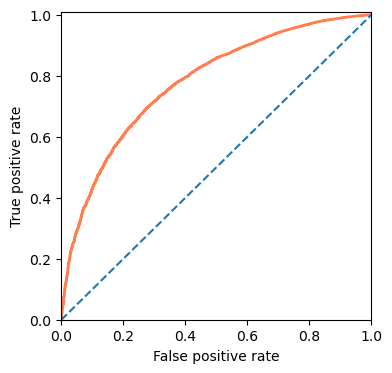

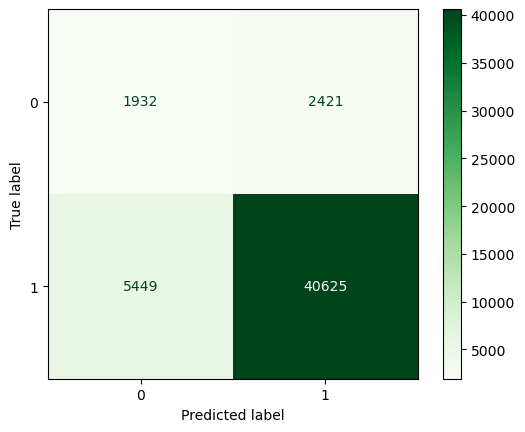

In [63]:
print('Meilleurs hyperparamètres : ' + str(XGB_SMOTE_RUS.best_params_))

result_XGB_SMOTE_RUS = result(XGB_SMOTE_RUS, X_test, y_test, prediction_XGB_SMOTE_RUS[:, 1])

In [64]:
#with open('XGB_SMOTE_RUS.pickle', 'wb') as file:
    #pickle.dump(XGB_SMOTE_RUS, file)

#### SMOTE + Random UnderSampling (RUS) - Logistic Regression

In [66]:
LR_SMOTE_RUS = GridSearchCV(LogisticRegression(random_state=0),
                                 param_grid=param_LR,
                                 cv=cv_strat,
                                 scoring='roc_auc',
                                 verbose=3)

# LR_SMOTE_RUS.fit(X_SMOTE_RUS, y_SMOTE_RUS)
LR_SMOTE_RUS = pickle.load(open('LR_SMOTE_RUS.pickle', 'rb'))

prediction_LR_SMOTE_RUS = LR_SMOTE_RUS.predict_proba(X_test)

Meilleurs hyperparamètres : {'C': 0.03359818286283781, 'penalty': 'l2'}
Cross Validation score = 0.75
Test score = 0.74
RMSE = 0.36
MSE = 0.13
RSE = 1.67
ROC_AUC = 0.74
Recall = 0.87
Precision = 0.94
Score F1 = 0.90


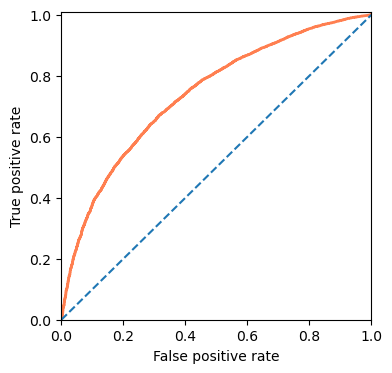

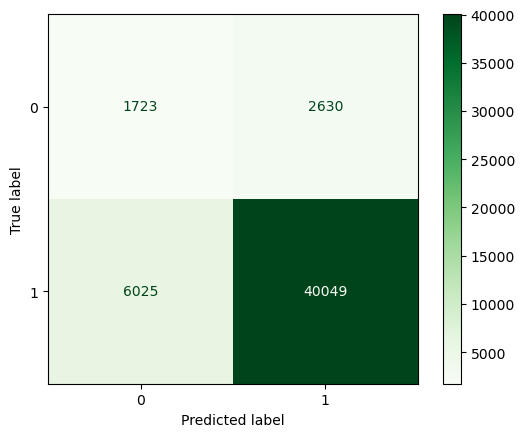

In [67]:
print('Meilleurs hyperparamètres : ' + str(LR_SMOTE_RUS.best_params_))

result_LR_SMOTE_RUS = result(LR_SMOTE_RUS, X_test, y_test, prediction_LR_SMOTE_RUS[:, 1])

In [68]:
#with open('LR_SMOTE_RUS.pickle', 'wb') as file:
    #pickle.dump(LR_SMOTE_RUS, file)

#### Result comparison GridSearch SMOTE + Random UnderSampling (RUS)

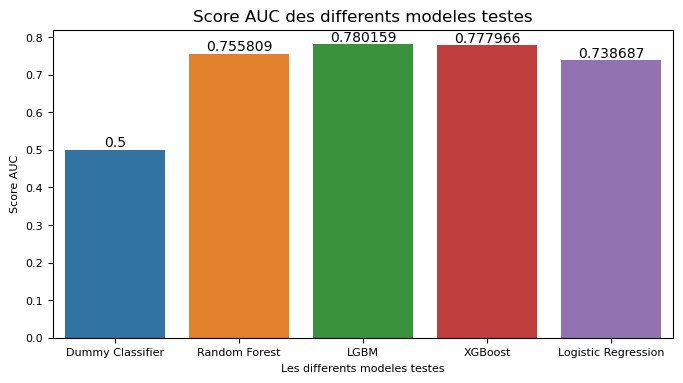

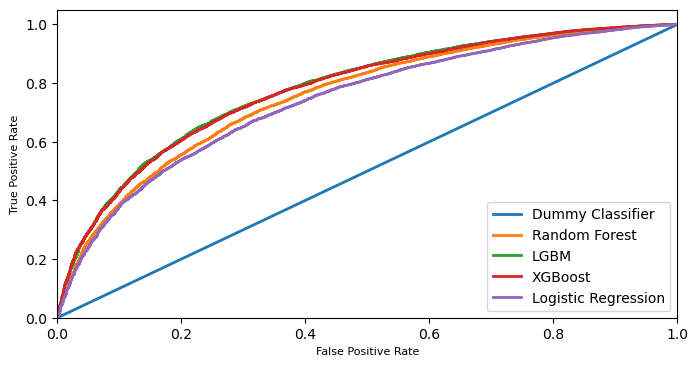

Modele,Dummy Classifier,Random Forest,LGBM,XGBoost,Logistic Regression
Score de Cross-Validation,,0.766467,0.786975,0.786522,0.748545
Score de test,0.913677,0.755809,0.780159,0.777966,0.738687
RMSE,0.293807,0.346775,0.34247,0.342454,0.363182
MSE,0.086323,0.120253,0.117286,0.117275,0.131901
RSE,1.094478,1.524675,1.487056,1.486917,1.672364
AUC,0.5,0.755809,0.780159,0.777966,0.738687
Rappel,0.913677,0.933284,0.94474,0.943758,0.938377
Precision,0.954892,0.933152,0.911906,0.911692,0.902482
F1,"[[0.0, 1.0], [0.0, 1.0], [2.0, 1.0]]","[[0.0, 0.0, 0.0, 0.00022972662531587412, 0.000...","[[0.0, 0.0, 0.0, 0.00022972662531587412, 0.000...","[[0.0, 0.0, 0.00022972662531587412, 0.00022972...","[[0.0, 0.0, 0.0, 0.00022972662531587412, 0.000..."


In [69]:
listeResult_SMOTE_RUS = [result_dummy,result_RF_SMOTE_RUS,result_LGBM_SMOTE_RUS, result_XGB_SMOTE_RUS, result_LR_SMOTE_RUS]
df_score_SMOTE_RUS = displayResult(listeResult_SMOTE_RUS)
df_score_SMOTE_RUS.head(df_score_SMOTE_RUS.shape[0])

D'après le score ROC , modèle XGBoosting sans oversampling ni subsampling porte le meilleur résultat, et LGBM porte le 2ème meilleur résultat avec un temps entrîné plus faible, dans ces cas là nous partirons sur le modèle LGBM sans
échantillonage

In [74]:
#enregistrer mon meilleur modèle entrîné
best_model = pickle.load(open('LGBM.pickle', 'rb')).best_estimator_


#### Explication globale

- Nous pouvons penser à ces explications en termes globaux (c'est-à-dire, comment chaque variable impacte-t-elle les résultats sur la moyenne pour l'ensemble des données ?) 

- ou en termes locaux (c'est-à-dire, comment chaque variable impacte-t-elle les prévisions pour un client donné ?)

,features,weights
213,PAYMENT_RATE,181
31,EXT_SOURCE_3,174
29,EXT_SOURCE_1,172
30,EXT_SOURCE_2,150
9,DAYS_BIRTH,108
515,INSTAL_DAYS_ENTRY_PAYMENT_MAX,78
6,AMT_ANNUITY,78
212,ANNUITY_INCOME_PERC,76
516,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,71
10,DAYS_EMPLOYED,67


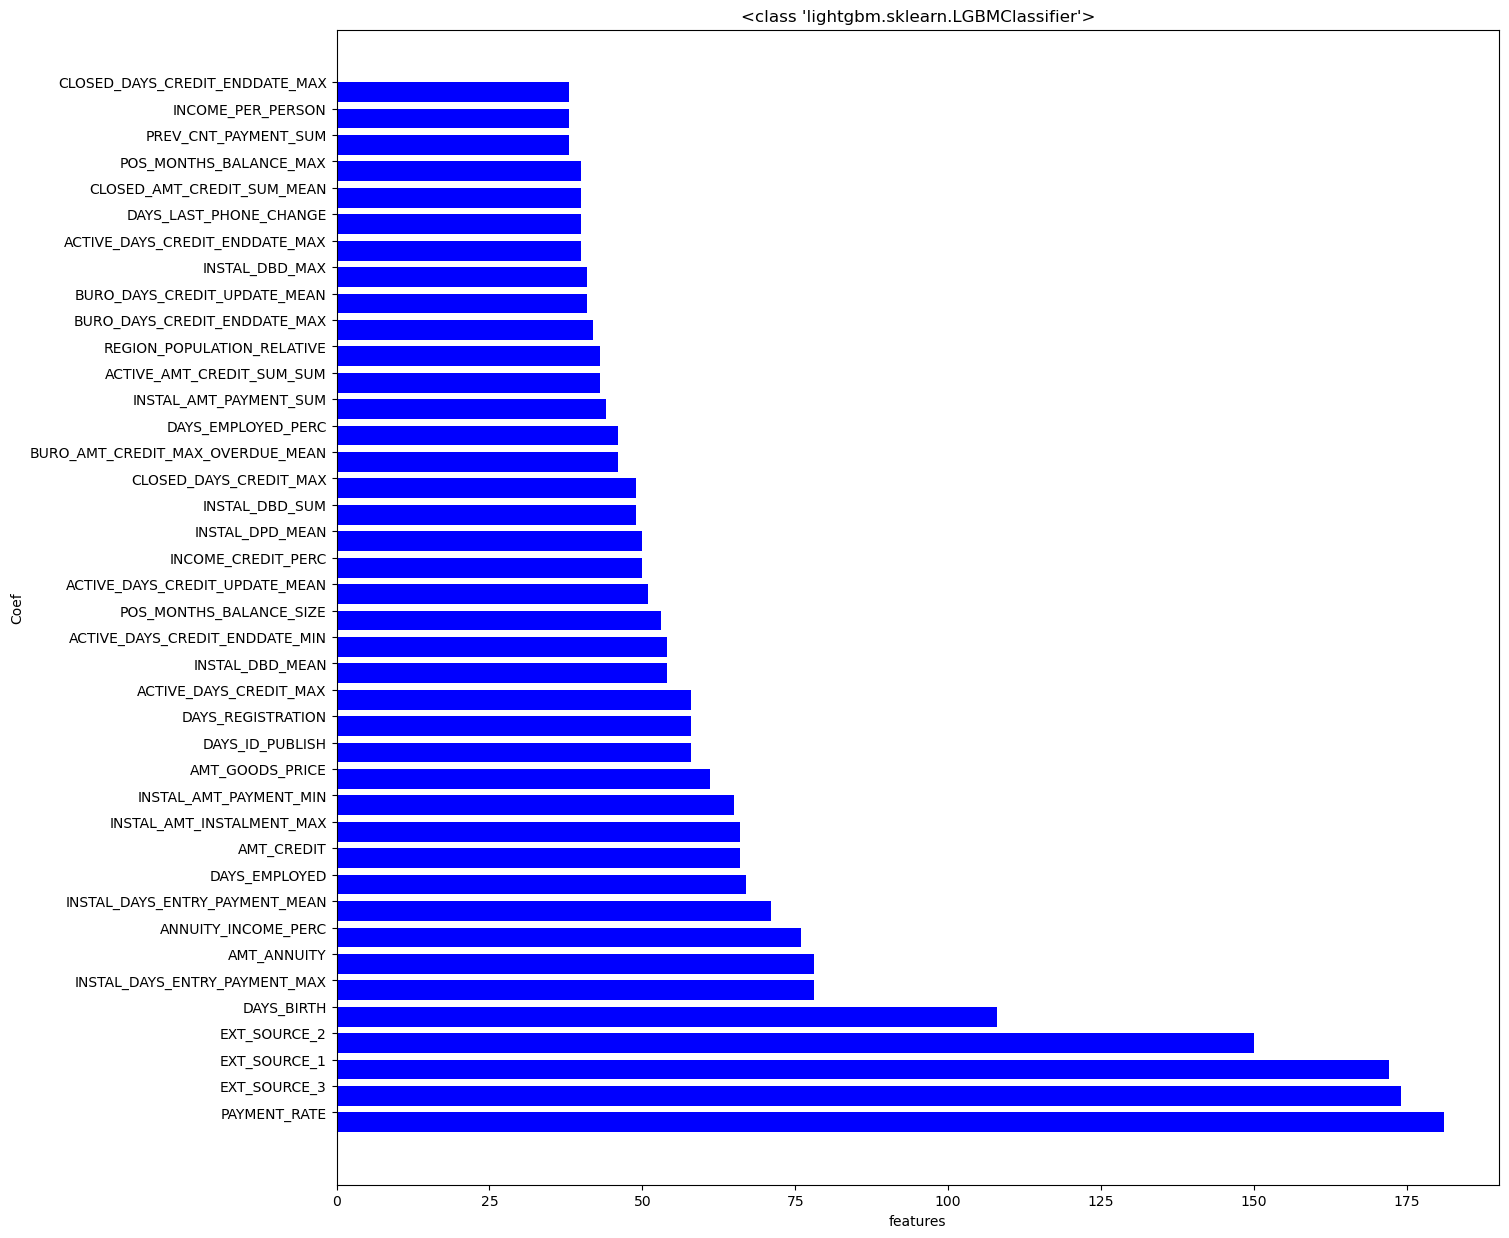

In [77]:
num_features = 10 
features=[]

for columns in X_train.columns: 
    features.append(columns)

coeff=best_model.feature_importances_  

df_imp_features = pd.DataFrame({"features":features}).join(pd.DataFrame({"weights":coeff}))
df_imp_features_top40=df_imp_features.sort_values(by=['weights'], ascending=False).head(40) 

coeff_top40=df_imp_features_top40['weights']
features_top40=df_imp_features_top40['features']

fig, ax = plt.subplots(1,1,figsize=(15,15))    
width = 0.75 # the width of the bars 
ind = np.arange(len(coeff_top40))  
ax.barh(ind, coeff_top40, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(features_top40, minor=False)
plt.title(LGBMClassifier)
plt.xlabel('features')
plt.ylabel('Coef')      
df_imp_features_top40 = pd.DataFrame({"features":features_top40}).join(pd.DataFrame({"weights":coeff_top40}))
df_imp_features_top40.sort_values(by=['weights'], ascending=False) 

#### Explication locale par SHAP

In [78]:
id = 66

In [81]:
shap.initjs()

In [82]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [83]:
print('Valeur réelle :', y_test[id])
print('Valeur prédite :', best_model.predict_proba(X_test)[id, 1])

Valeur réelle : 1
Valeur prédite : 0.9921658869356336


In [84]:
shap.force_plot(explainer.expected_value[1], shap_values[1][id, :], X_test.iloc[id, :], link='logit')

On peut remarquer que EXT_SOURCE_3, EXT_SOURCE_1 et EXT_SOURCE_2 ont une forte influence sur le résultat pour client id 66 poussant la prédiction vers la droite

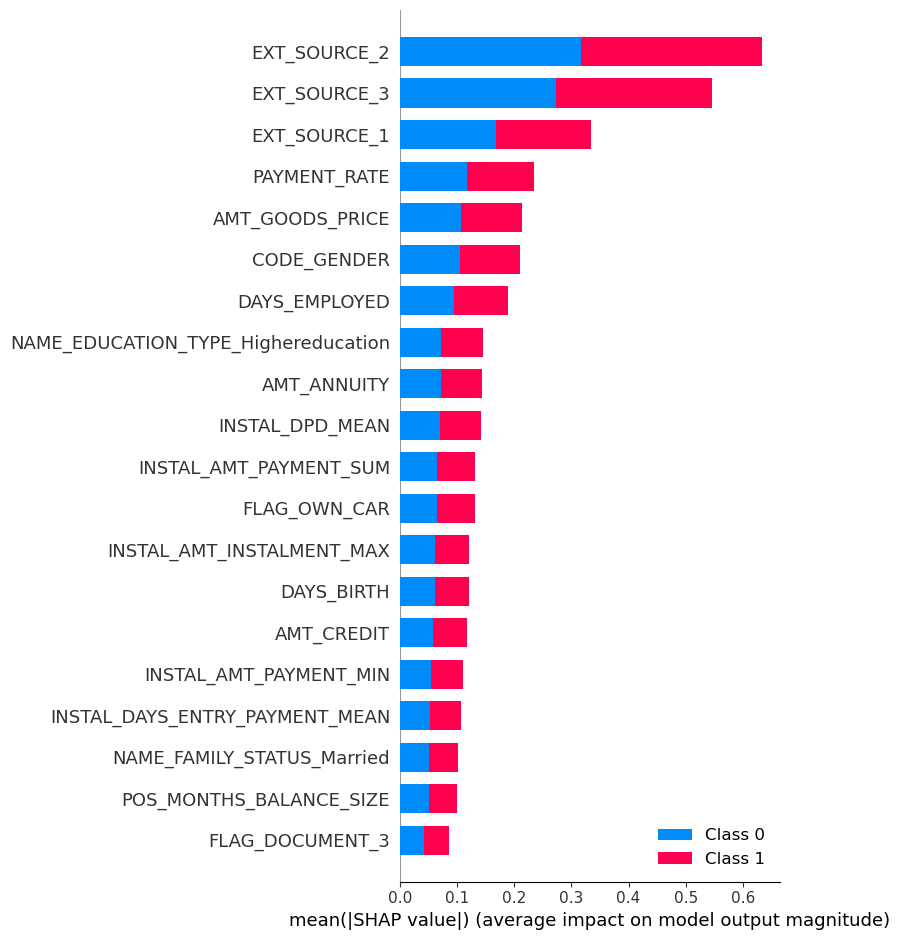

In [85]:
shap.summary_plot(shap_values, X_test)